In [4]:
import gymnasium as gym
from ray.rllib.models.preprocessors import get_preprocessor

from TradingEnv import TradingMarket

from gymnasium import spaces
import numpy as np

import pandas as pd
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

In [5]:
data_inicial = "2012-01-01"
data_final = "2017-12-31"
df = pdr.get_data_yahoo("AAPL", data_inicial, data_final)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449688,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516596,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400


In [7]:
gym.envs.register(
    id='TradeEnv-v0',
    entry_point=TradingMarket,
    kwargs={
        "env_config": {
            "OHCL":df,
            "initial_value": 1000,
            "positions": [0, 1], 
            "window": 15,
            "epi_len":300
        }
    }
)

c:\Users\gutop\Documents\BIA\BIA_Semestre_8\Residencia\Semana_6\code\ray-rllib\rllib-resi\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment TradeEnv-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [10]:
with open('log_dqn_1.txt', 'r') as file:
    hist1 = eval(file.read())

with open('log_dqn_2.txt', 'r') as file:
    hist2 = eval(file.read())

with open('log_dqn_3.txt', 'r') as file:
    hist3 = eval(file.read())

with open('log_dqn_4.txt', 'r') as file:
    hist4 = eval(file.read())

with open('log_dqn_5.txt', 'r') as file:
    hist5 = eval(file.read())

with open('log_dqn_return.txt', 'r') as file:
    histR = eval(file.read())

with open('log_ddpg.txt', 'r') as file:
    histpg = eval(file.read().replace('], dtype=float32)', '').replace('array([', ''))

In [13]:
set([x[2] for x in histpg])

{0, 1.0}

In [2]:
import utils

In [71]:
pat1 = [h[1] for h in hist1]
pat2 = [h[1] for h in hist2]
pat3 = [h[1] for h in hist3]
pat4 = [h[1] for h in hist4]
pat5 = [h[1] for h in hist5]
patR = [h[1] for h in histR]
patpg = [h[1] for h in histpg]
dates = [h[0] for h in hist1]
prices = [h[3] for h in hist1]

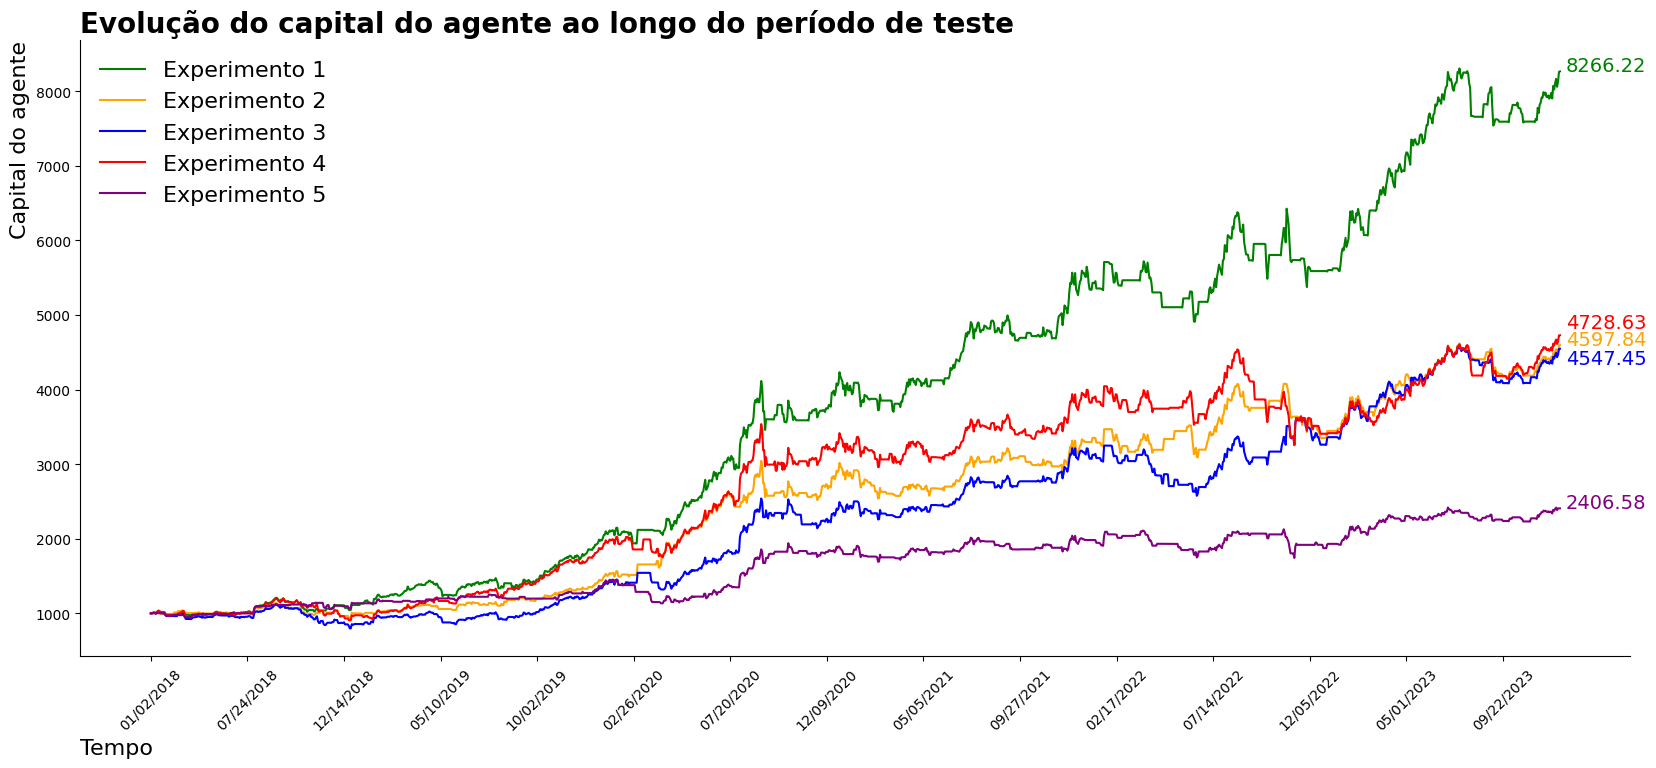

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.title("Evolução do capital do agente ao longo do período de teste", fontsize=20, fontweight="bold", loc='left')
plt.xlabel("Tempo", fontsize=16, loc='left')
plt.ylabel("Capital do agente", fontsize=16, loc='top')
plt.plot(pat1, label='Experimento 1', color='green')
plt.text(1465, pat1[-1], f"{pat1[-1]:.2f}", color='green', fontsize=14)
plt.plot(pat2, label='Experimento 2', color='orange')
plt.text(1465, pat2[-1], f"{pat2[-1]:.2f}", color='orange', fontsize=14)
plt.plot(pat3, label='Experimento 3', color='blue')
plt.text(1465, pat3[-1]-200, f"{pat3[-1]:.2f}", color='blue', fontsize=14)
#plt.plot((1000/prices[0])*np.array(prices))
plt.plot(pat4, label='Experimento 4', color='red')
plt.text(1465, pat4[-1]+100, f"{pat4[-1]:.2f}", color='red', fontsize=14)
plt.plot(pat5, label='Experimento 5', color='purple')
plt.text(1465, pat5[-1], f"{pat5[-1]:.2f}", color='purple', fontsize=14)
plt.xticks(range(1460)[::100], dates[::100], rotation= 45)
plt.legend(prop={"size":16}, frameon=False)
#plt.plot(patR)
#plt.plot(patpg)
plt.show()

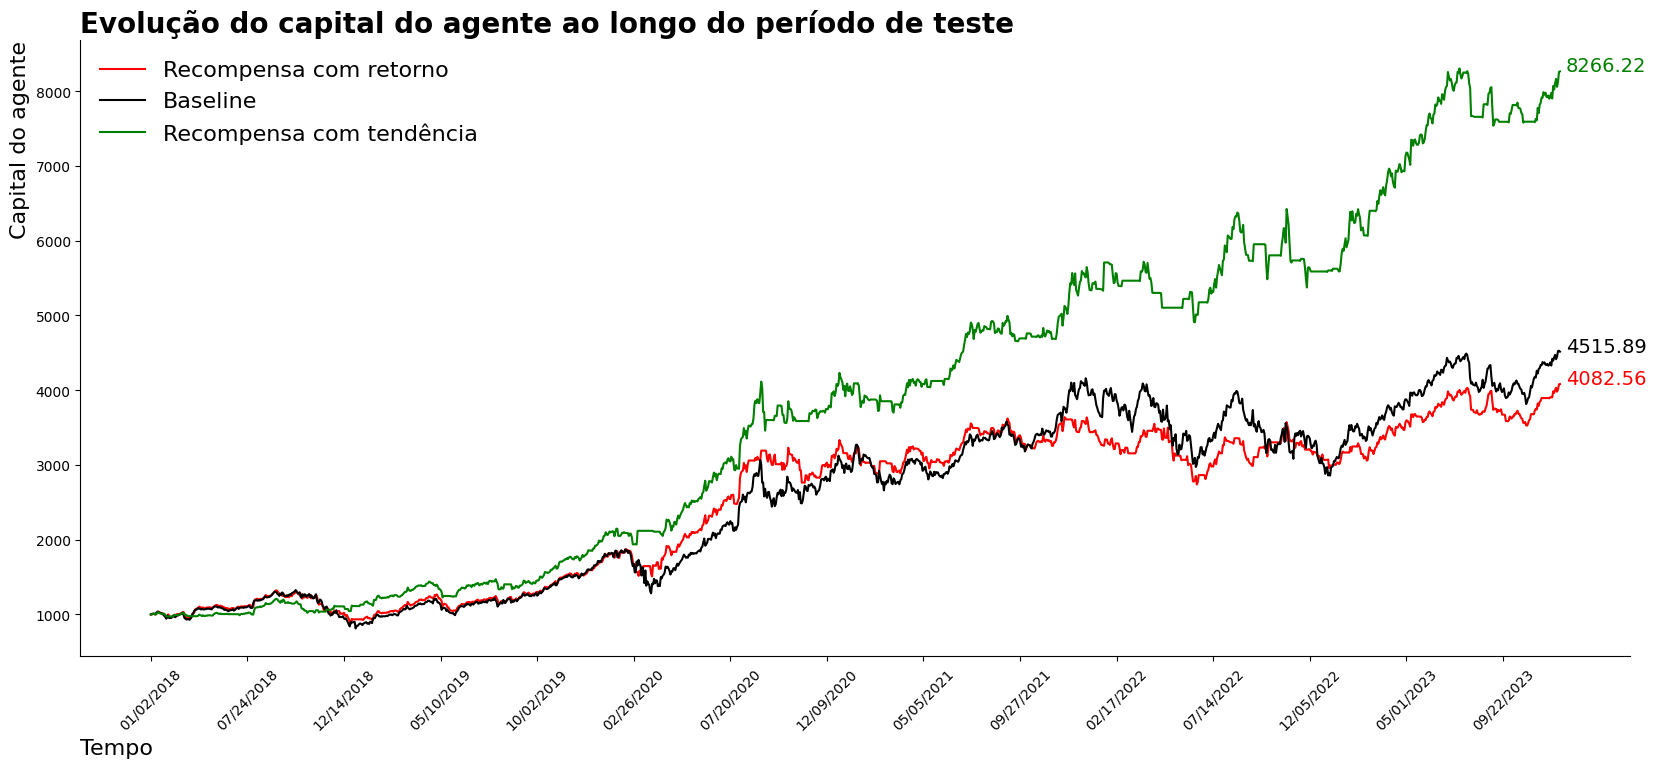

In [75]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 8))
plt.title("Comparação da evolução do capital entre diferentes recompensas e o baseline", fontsize=20, fontweight="bold", loc='left')
plt.xlabel("Tempo", fontsize=16, loc='left')
plt.ylabel("Capital do agente", fontsize=16, loc='top')

plt.plot(patR, label='Recompensa com retorno', color='red')
plt.text(1465, patR[-1], f"{patR[-1]:.2f}", color='red', fontsize=14)

baseline = (1000/prices[0])*np.array(prices)
plt.plot(baseline, label='Baseline', color='k')
plt.text(1465, baseline[-1], f"{baseline[-1]:.2f}", color='k', fontsize=14)

plt.plot(pat1, label='Recompensa com tendência', color='green')
plt.text(1465, pat1[-1], f"{pat1[-1]:.2f}", color='green', fontsize=14)

plt.xticks(range(1460)[::100], dates[::100], rotation= 45)
plt.legend(prop={"size":16}, frameon=False)
#plt.plot(patR)
#plt.plot(patpg)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.title("Evolução do capital do agente ao longo do período de teste", fontsize=20, fontweight="bold", loc='left')
plt.xlabel("Tempo", fontsize=16, loc='left')
plt.ylabel("Capital do agente", fontsize=16, loc='top')
plt.plot(pat1, label='Experimento 1', color='green')
plt.text(1465, pat1[-1], f"{pat1[-1]:.2f}", color='green', fontsize=14)
plt.plot(pat2, label='Experimento 2', color='orange')
plt.text(1465, pat2[-1], f"{pat2[-1]:.2f}", color='orange', fontsize=14)
plt.plot(pat3, label='Experimento 3', color='blue')
plt.text(1465, pat3[-1]-200, f"{pat3[-1]:.2f}", color='blue', fontsize=14)
#plt.plot((1000/prices[0])*np.array(prices))
plt.plot(pat4, label='Experimento 4', color='red')
plt.text(1465, pat4[-1]+100, f"{pat4[-1]:.2f}", color='red', fontsize=14)
plt.plot(pat5, label='Experimento 5', color='purple')
plt.text(1465, pat5[-1], f"{pat5[-1]:.2f}", color='purple', fontsize=14)
plt.xticks(range(1460)[::100], dates[::100], rotation= 45)
plt.legend(prop={"size":16}, frameon=False)
#plt.plot(patR)
#plt.plot(patpg)
plt.show()

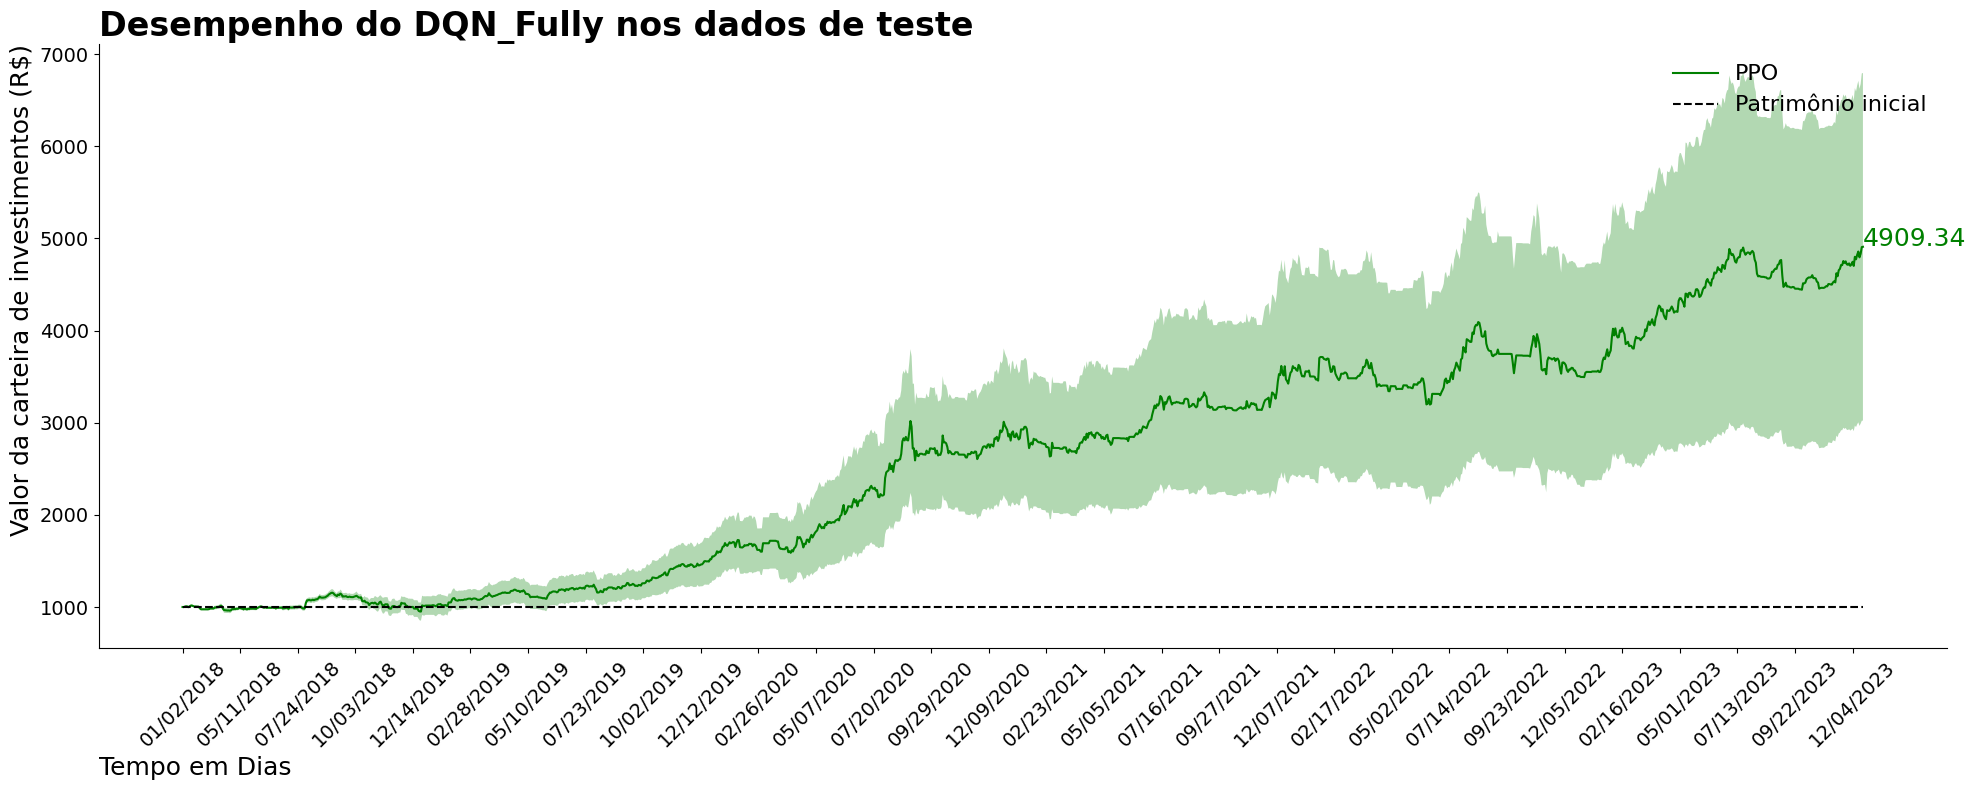

In [86]:
dates = [h[0] for h in hist1]
utils.plot_results(dates, np.mean([pat1, pat2, pat3, pat4, pat5], axis=0), np.std([pat1, pat2, pat3, pat4, pat5], axis=0), 1000, 'Fully','.', "DQN")

In [69]:
import pandas_datareader.data as pdr
import yfinance
import utils

yfinance.pdr_override()


dt_ini_train = "2012-01-01"
dt_final_train = "2023-12-31"
df_train = pdr.get_data_yahoo("AAPL", dt_ini_train, dt_final_train)

[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Cotação do ativo')

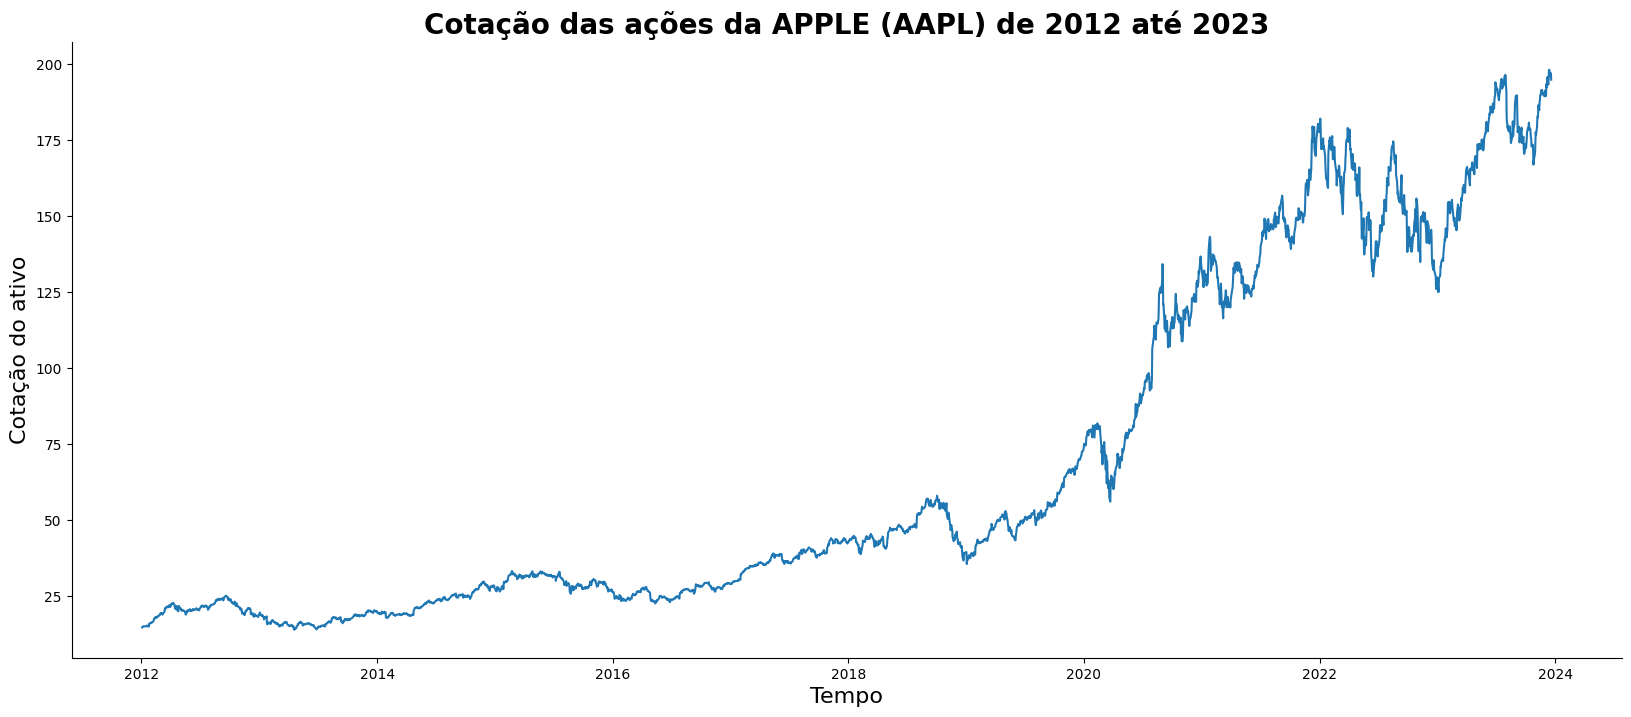

In [70]:
plt.figure(figsize =(20, 8))
plt.title("Cotação das ações da APPLE (AAPL) de 2012 até 2023", fontsize =20, fontweight = "bold")
plt.plot(df_train["Close"])
plt.xlabel('Tempo', fontsize =16)
plt.ylabel('Cotação do ativo', fontsize =16)

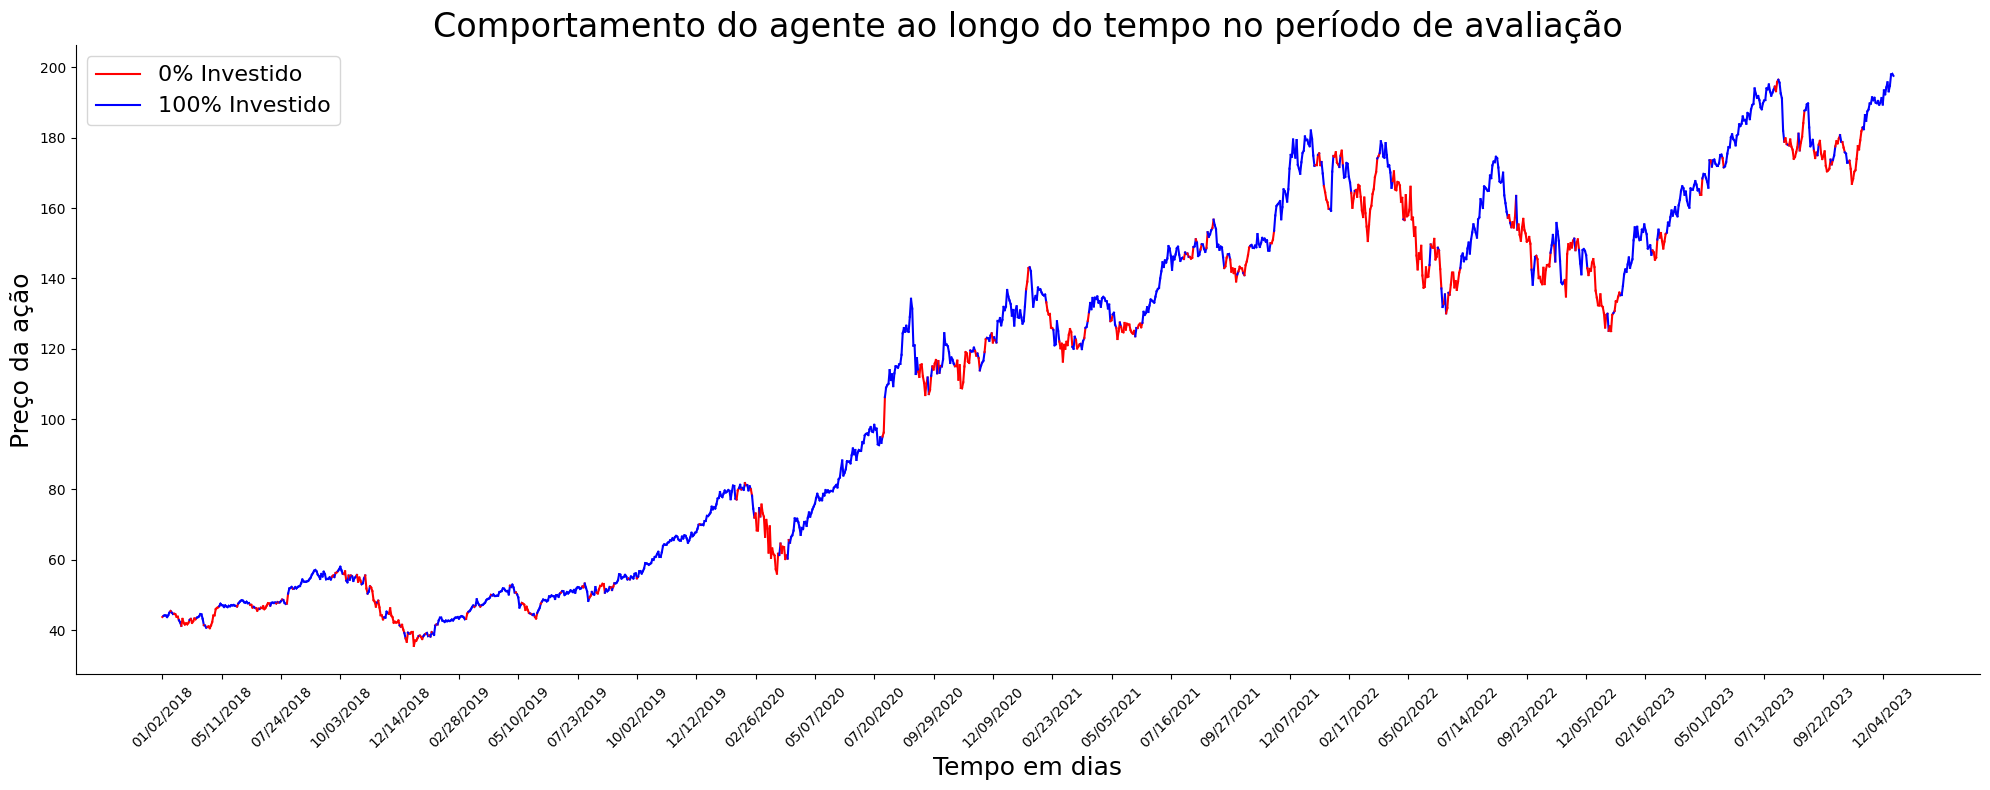

In [21]:
prices = [h[3] for h in hist1]
acts = [h[2] for h in hist1]
dates = [h[0] for h in hist1]
utils.plot_actions(acts, dates, prices, ".", 0)

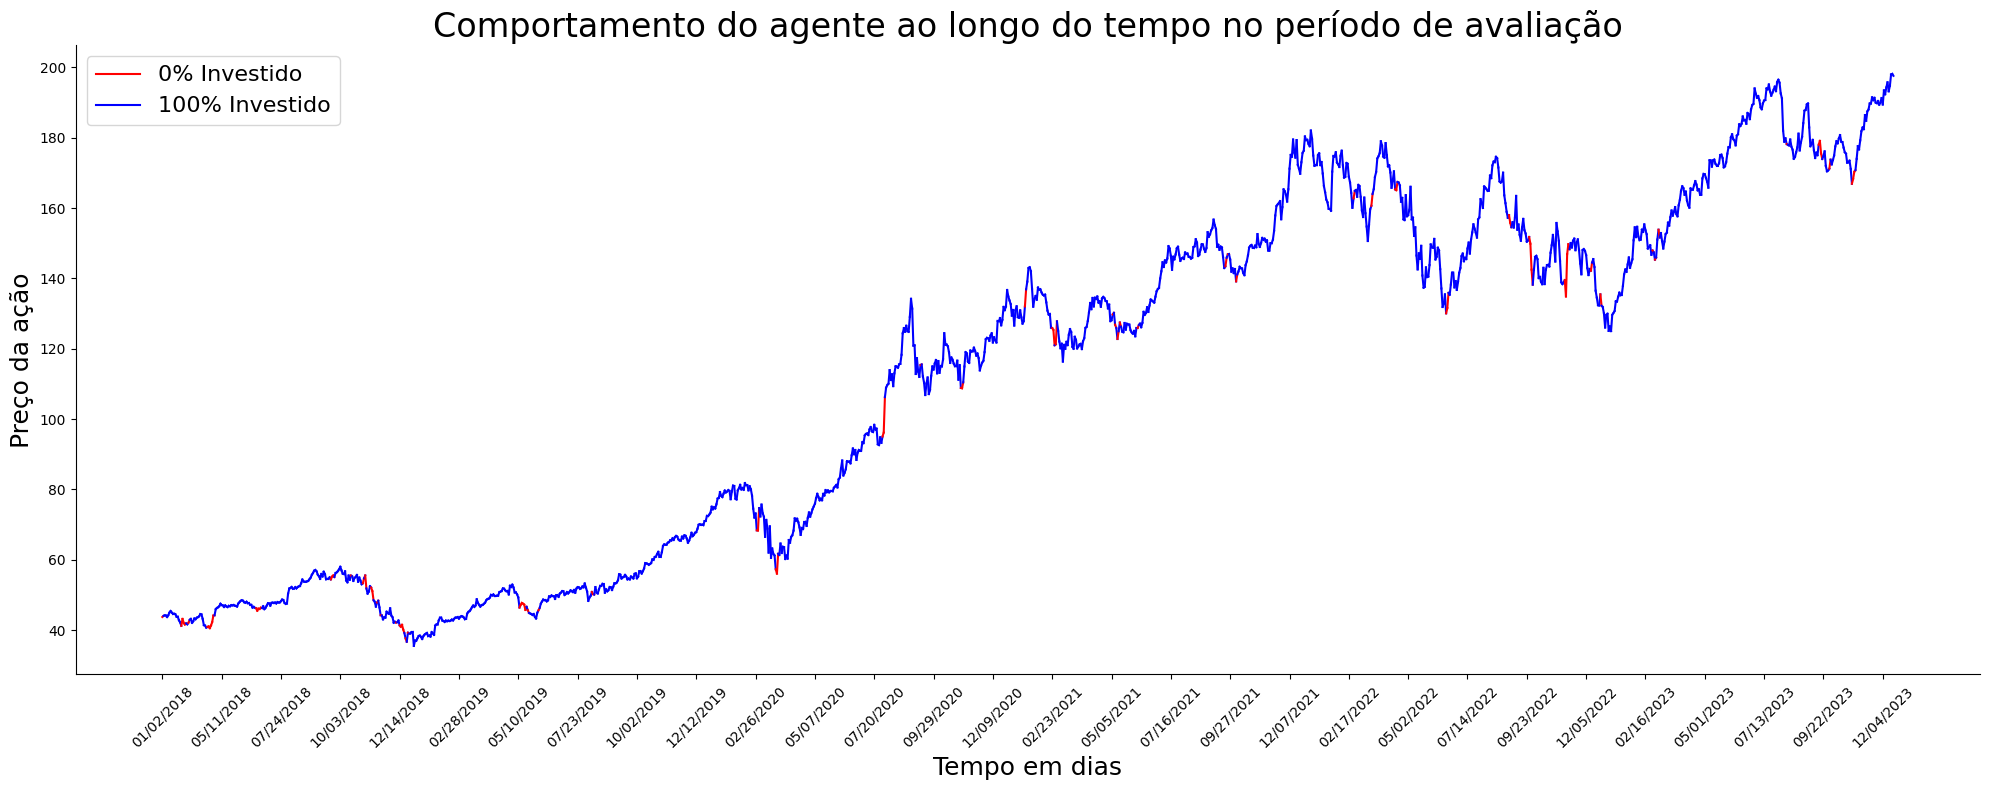

In [18]:
prices = [h[3] for h in histpg]
acts = [h[2] for h in histpg]
dates = [h[0] for h in histpg]
utils.plot_actions(acts, dates, prices, ".", 0)

In [8]:
np.set_printoptions(suppress=True)

In [21]:
env.observation_space.shape[0]

7

In [9]:
env = gym.make('TradeEnv-v0')
obs, _ = env.reset()
done = False
rwds = []
while not done:
    action = env.action_space.sample()
    obs, rwd, done, *_ = env.step(action)
    rwds.append(rwd)

print(f"Recompensa obtida: {np.exp(np.mean(rwds))}")
last_price = env.historical_price.iloc[env.idx, 3]
print(f"Patrimônio final: {env.valorisation(last_price)}")

Recompensa obtida: 0.9867551618071957
Patrimônio final: 1032.9030318210866


In [1]:
import math
0.1 + (0.9 - 0.1) * math.exp(-1 * 18239/100000)

0.7666210394240917

In [ ]:
0.995

In [ ]:
import gymnasium as gym

from stable_baselines3 import DQN

env = gym.make("CartPole-v1", render_mode="human")

model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)
model.save("dqn_cartpole")

del model # remove to demonstrate saving and loading

model = DQN.load("dqn_cartpole")

obs, info = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()

In [9]:
import utils

In [11]:
history = [
    [   1, 1000,    0,   14],
    [   2,  999,    1,   12],
    [   3, 1002,    0,   11]
]

utils.opportunity(history=history, k=4)

0

In [6]:
list(range(3, 1, -1))

[3, 2]

In [2]:
import utils
utils.sharpe_ratio

<function utils.rewards.sharpe_ratio(history, risk_free=0)>

In [1]:
list(range(1, 1, -1))

[]

In [ ]:
def reward(prices, action):
    bullish = prices[-2] < prices[-1]
    if bullish and action==1:
        return 1
    elif bullish and action==0:
        return -1
    elif not bullish and action==1:
        return -1
    elif not bullish and action==0:
        return 1
